In [0]:

	
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.0.0


uint8
(1634, 1634, 3)


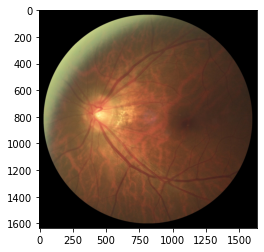

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('/content/drive/My Drive/Colab Notebooks/project prog/REFUGE-Validation400/REFUGE-Validation400/V0002.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
import pandas as pd
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/project prog/REFUGE-Validation400/Fovea_locations.xlsx')

In [122]:
data.head()

,ID,ImgName,Glaucoma Label,Fovea_X,Fovea_Y
0,1,V0001.jpg,0,1050.07,858.55
1,2,V0002.jpg,0,1131.07,834.53
2,3,V0003.jpg,0,867.01,838.64
3,4,V0004.jpg,0,1113.65,877.35
4,5,V0005.jpg,0,1138.70,841.77


In [0]:
X_test_coord=data['Fovea_X']
Y_test_coord=data['Fovea_Y']

(0.0, 1600.0)

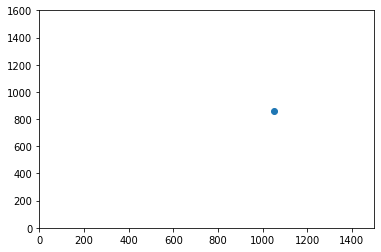

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_test_coord[0],Y_test_coord[0])
plt.xlim(0,1500)
plt.ylim(0,1600)

In [0]:
# load image and convert to and from NumPy array
import numpy as np
from PIL import Image
from numpy import asarray
# load the image
data=np.zeros((400,100,100,3))
for i in range(1,201):
  path= "/content/drive/My Drive/Colab Notebooks/project prog/REFUGE-Validation400/REFUGE-Validation400/V" +str(i)+".jpg"

  image = Image.open(path)

# convert image to numpy array
# resize image and ignore original aspect ratio
  img_resized = image.resize((100,100))
# report the size of the thumbnail
  #print(img_resized.size)

  data[i] = asarray(img_resized)


In [0]:
data1=data

In [0]:
#RGB Conversion to black and white
X=[0.3,0.59,0.11]
data_temp=np.zeros((400,100,100))
for i in range(400):
  data_temp[i]=np.dot(data1[i],X)

In [7]:
#min(X_test_coord)
#max(Y_test_coord)
X_test_coord=(X_test_coord).values
Y_test_coord=(Y_test_coord).values
'''
X_test_coord=np.around(X_test_coord)
Y_test_coord=np.around(Y_test_coord)
'''

'\nX_test_coord=np.around(X_test_coord)\nY_test_coord=np.around(Y_test_coord)\n'

In [0]:
#preprocessing
data_temp=data_temp/255.0

from sklearn.model_selection  import train_test_split
X_train,X_test,x_train_coord,x_test_coord,y_train_coord,y_test_coord=train_test_split(data_temp,X_test_coord,Y_test_coord,test_size=0.2)



In [0]:
#Using channels last
X_train=X_train.reshape(X_train.shape[0],100,100,1)
X_test=X_test.reshape(X_test.shape[0],100,100,1)

In [10]:
X_train.shape[0]

320

In [11]:
! pip install keras-tuner

     |████████████████████████████████| 61kB 2.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=a74883f69583e24bdc777ab1c947c486132b26a90a7e112ca3a01136dce04643
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=954560d4506d0ea20d26b390dea9a14844dcd77fb422ca106bb1dc5279ee440d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
#Building model
from keras.layers import Dense,LeakyReLU,ELU,PReLU,Dropout,Conv2D
from keras.models import Sequential
def  build_model(hp):
  model=keras.Sequential([
                          keras.layers.Conv2D(filters=hp.Int('Conv_1_filter',min_value=32,max_value=64,step=16),
                                              kernel_size=hp.Choice('Convo_1_kernels',values=[3,5]),
                                              activation='relu',
                                              input_shape=(X_train.shape[1],X_train.shape[2],1)),
                           keras.layers.Conv2D(filters=hp.Int('Conv_1_filter',min_value=64,max_value=128,step=16),
                                              kernel_size=hp.Choice('Convo_1_kernels',values=[3,5]),
                                              activation='relu'),
                                              
                           keras.layers.Conv2D(filters=hp.Int('Conv_1_filter',min_value=128,max_value=256,step=16),
                                              kernel_size=hp.Choice('Convo_1_kernels',values=[3,5]),
                                              activation='relu'),
                                              
                           keras.layers.Conv2D(filters=hp.Int('Conv_1_filter',min_value=256,max_value=512,step=16),
                                              kernel_size=hp.Choice('Convo_1_kernels',values=[3,5]),
                                              activation='relu'),
                          
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=hp.Int('Dense_1_units',max_value=128,min_value=64,step=16),
                                             activation='relu'
                                             ),
                          
                          keras.layers.Dense(units=1,
                                             activation='linear'
                                             )
                          
                                             ])
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()
  return(model)

In [0]:
from kerastuner import RandomSearch
import kerastuner.engine.hyperparameters as Hyperparameters

In [45]:
tuner_search=RandomSearch(build_model,
                          objective='val_mean_absolute_error',
                          max_trials=5
                          )
tuner_search.search(X_train,y_train_coord,epochs=3,validation_split=0.1)
model=tuner_search.get_best_models(num_models=1)[0]
model.fit(X_train,y_train_coord,epochs=500,validation_split=0.2,initial_epoch=3)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 270848)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                17334336  
____________________________________

In [0]:
preds_y=model.predict(X_test)
#We train one after the another for both x_coords and y_coords

In [0]:
'''
#Regression problem
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

'''

In [0]:
arr_x=np.zeros(len(preds_x))
arr_y=np.zeros(len(preds_x))
for i in range(len(preds_x)):
  arr_x[i]=preds_x[i][0]
  arr_y[i]=preds_y[i][0]

In [0]:
(pred_dict1)=pd.DataFrame(arr_y,columns=['y'])


In [0]:
arr_x=arr_x.reshape(80,1)

In [0]:
preds=pd.concat([pred_dict,pred_dict1],axis=1)

In [89]:
preds

,x,y
0,1055.424805,847.229065
1,990.666687,858.323853
2,1028.891724,840.474731
3,1099.657227,850.867493
4,1118.293457,848.790955
...,...,...
75,1090.904419,850.683289
76,1055.424805,847.229065
77,1069.565430,856.872009
78,1055.424805,847.229065
